## Computer Exercise \#3 ##

 Most of the code needed for this exercise is included below.  However, there are some choices that need to be made in how some of the calls to classes are done, and some expansion of the code is necessary.  For example, you are given the basic code for creating pair-plots, but you may want to make more than one.

### Common Imports ###

In [1]:
#Common imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

### Read Dataset ###

In [2]:
diabetesDF = pd.read_csv('diabetes2.csv')
print(diabetesDF.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Data Preperation ##
__(a)__ Separate your DataFrames into a training set of size N1 = 600, with a test set containing
all of the remaining samples, and convert them into NumPy arrays to form the labeled
training set (X_train, y_train) and labeled test set (X_test, y_test).
### Splitting the data set ###

In [4]:
N1 = 600 #Put in a value here
DF_train = diabetesDF[:N1]
DF_test = diabetesDF[N1:]

### Extract feature vectors and target outputs into two numpy arrays ###

In [5]:
X_train = np.asarray(DF_train.drop('Outcome',1))
y_train = np.asarray(DF_train['Outcome'])
X_test = np.asarray(DF_test.drop('Outcome',1))
y_test = np.asarray(DF_test['Outcome'])

### Data Scaling ###
__Standard Classifier:__

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Two different scalers. Decide which one to use
#     Minmax or Standard
#scaler=MinMaxScaler()
scaler=StandardScaler()

In [7]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)

(b) Scale the training set using one of the methods above. Check to see what the scaled
features look like by making box plots of the features before and after scaling. This may
be done for the training set X_train as follows:

    plt.boxplot(X_train, manage_ticks=False)
    plt.yscale("symlog")
    plt.xlabel("Feature index")
    plt.ylabel("Feature magnitude")
    plt.show()
    
An example of what your box plot might look like is shown below. You may wish to read
the documentation on boxplot to see how to interpret this plot.
Box plot of the unscaled training set.

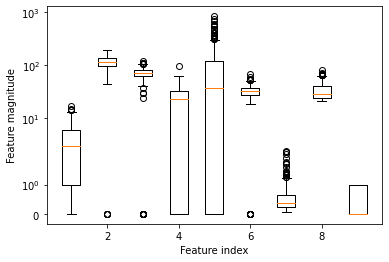

In [8]:
plt.boxplot(DF_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.show()

__MinMax Scaler:__

In [9]:
N1 = 600 #Put in a value here
DF_train = diabetesDF[:N1]
DF_test = diabetesDF[N1:]

In [10]:
X_train = np.asarray(DF_train.drop('Outcome',1))
y_train = np.asarray(DF_train['Outcome'])
X_test = np.asarray(DF_test.drop('Outcome',1))
y_test = np.asarray(DF_test['Outcome'])

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Two different scalers. Decide which one to use
#     Minmax or Standard
scaler=MinMaxScaler()
#scaler=StandardScaler()

In [12]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)

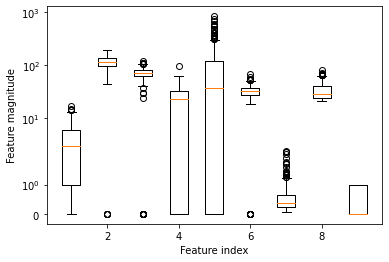

In [13]:
plt.boxplot(DF_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.show()

Do you see any issues or concerns with the way the data is scaled for the two types of
scalers?

> There is an issue. namely that in both cases, the plots for feartures: 5, 6, 7, and 8 have a signifficantly large amount of outliers. However it seems that the MinMax scaler is slightly better in this regard.

__(c)__ Next, scale the test set. Here you have two options to consider.

__i.__ Scale the training set and then scale the test set in exactly the same way, or

__ii.__ Scale the training set and the test set independently so that they both have features
in the range zero to one in the case of the MinMax scaler, or have zero mean and
unit variance for the standardization scaler.

Decide which approach you should use, explain why you made this choice, and then scale
the test set.

When you are satisfied with the scaling that was done, proceed to the next part.

> I have chosen to use method __i.__ and scale the training set and the test set in exactly the same way. My reasoning behind this is that as the classifier has been trained using one scaler, it is logical that the test data should scale similarly.

In [14]:
X_train = np.asarray(DF_train.drop('Outcome',1))
y_train = np.asarray(DF_train['Outcome'])
X_test = np.asarray(DF_test.drop('Outcome',1))
y_test = np.asarray(DF_test['Outcome'])

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Two different scalers. Decide which one to use
#     Minmax or Standard
scaler=MinMaxScaler()
#scaler=StandardScaler()

In [16]:
scaler.fit(X_train)
X_test = scaler.transform(X_test)

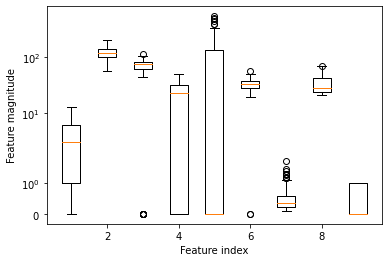

In [17]:
plt.boxplot(DF_test, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.show()

### Experiment ###

## Data Exploration ##

In [18]:
corr = diabetesDF.corr()
print(corr)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

(a) Explore the correlation between features (and the target values) using the corr method
of the diabetes DataFrame,
    
    corr = diabetesDF.corr()

The entries along the main diagonal are equal to one because each feature is perfectly correlated with itself. As shown here, the correlation between Glucose and Blood Pressure
is 0.15259.

In looking at all eight features, what pairs of features have the largest correlation?

What are the features that are most correlated with the target outputs? These will most
likely be the best candidates for detecting diabetes, assuming that they are not highly
correlated with each other.

> Correlations of : Age & Pregnancy, Insulin & SkinThickness, Insulin & Glucose, Skin Thickness & BMI. BMI & Outcome.

__(b)__ As an aid in visualization of the correlations, create a heat map as follows:

    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

Those cells that are the brightest red are the ones that have the largest correlation,
whereas those that are black have close to zero correlation.


<AxesSubplot:>

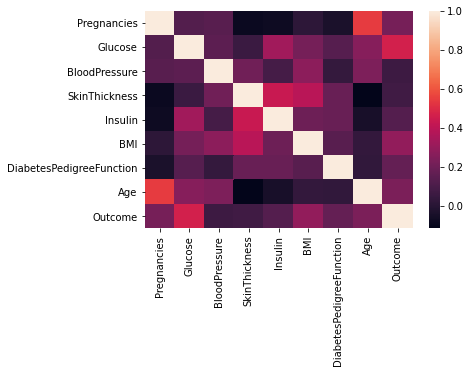

In [19]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

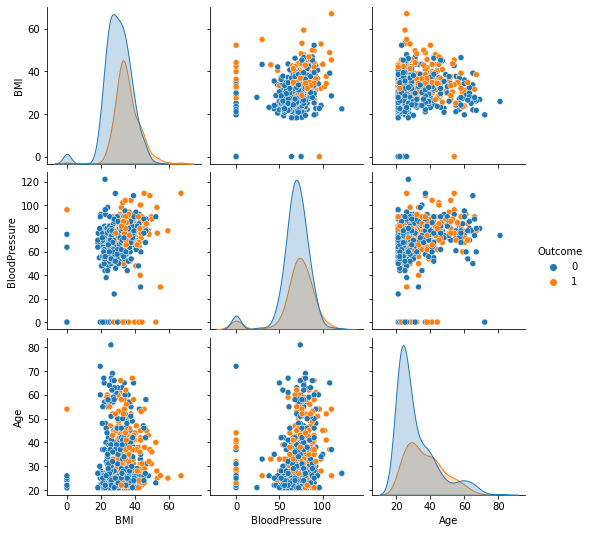

In [20]:
sns.pairplot(DF_train, vars=['BMI', 'BloodPressure', 'Age'], hue='Outcome')
plt.show()  

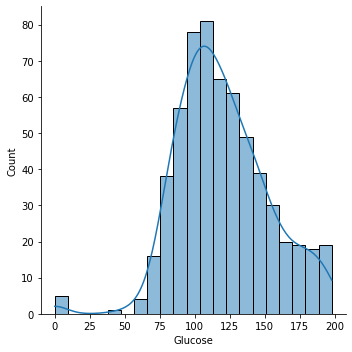

In [21]:
sns.displot(DF_train['Glucose'].dropna(),kde=True)

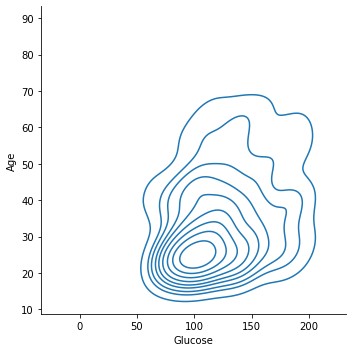

In [22]:
sns.displot(data=DF_train, x='Glucose',y='Age',kind='kde')

### Experiment ###
__DOUBLE CHECK!!!__
Using the training set (X_train,y_train), create some pair plots to get a better feeling of
the relationships (if any) between the features. Are you able to learn anything about the data
that might be useful? Although this is not something that you would generally do in practice,
from your pair plots you might be able to get a feeling about which features would be the best
for learning a classifier.

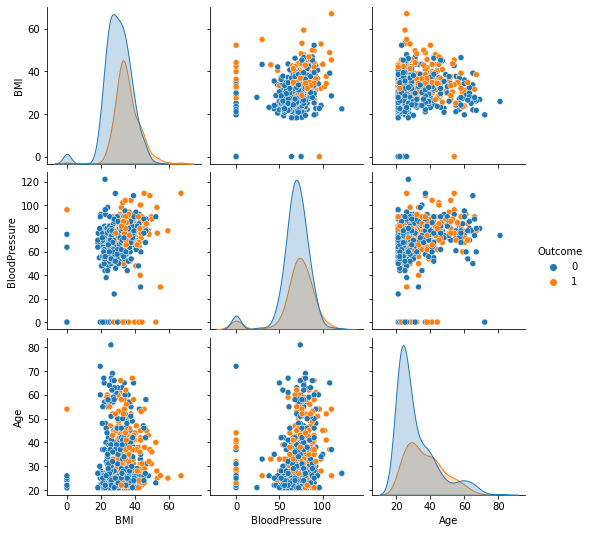

In [23]:
sns.pairplot(DF_train, vars=['BMI', 'BloodPressure', 'Age'], hue='Outcome')
#sns.displot(data=DF_train, x=X_train,y=y_train,kind='kde')
plt.show()

## Logistic Regression ##

In [24]:
N1 = 600 #Put in a value here
DF_train = diabetesDF[:N1]
DF_test = diabetesDF[N1:]

In [25]:
X_train = np.asarray(DF_train.drop('Outcome',1))
y_train = np.asarray(DF_train['Outcome'])
X_test = np.asarray(DF_test.drop('Outcome',1))
y_test = np.asarray(DF_test['Outcome'])

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Two different scalers. Decide which one to use
#     Minmax or Standard
#scaler=MinMaxScaler()
scaler=StandardScaler()

In [27]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

__(a)__ Use logistic regression on the training set to find a model for $Pr\{Y = 1\}$ where $Y = 1$ is
the class associated with the outcome __Has Diabetes__.

In [28]:
clf=LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)
print(clf.score(X_train,y_train))

0.785


In [29]:
y_test_pred = clf.predict(X_test)

In [30]:
y_test_prob = clf.predict_proba(X_test)
print(y_test_prob)

[[0.91403762 0.08596238]
 [0.85473092 0.14526908]
 [0.87406691 0.12593309]
 [0.26737259 0.73262741]
 [0.21128156 0.78871844]
 [0.65815786 0.34184214]
 [0.13065831 0.86934169]
 [0.9654624  0.0345376 ]
 [0.49055928 0.50944072]
 [0.93887649 0.06112351]
 [0.84874467 0.15125533]
 [0.2745221  0.7254779 ]
 [0.17275526 0.82724474]
 [0.68521662 0.31478338]
 [0.2601961  0.7398039 ]
 [0.90825588 0.09174412]
 [0.82663873 0.17336127]
 [0.98389523 0.01610477]
 [0.50667513 0.49332487]
 [0.72345375 0.27654625]
 [0.78196472 0.21803528]
 [0.82982859 0.17017141]
 [0.03894529 0.96105471]
 [0.78704469 0.21295531]
 [0.86661277 0.13338723]
 [0.83613478 0.16386522]
 [0.89697128 0.10302872]
 [0.74718007 0.25281993]
 [0.61487144 0.38512856]
 [0.94039478 0.05960522]
 [0.6773647  0.3226353 ]
 [0.89287629 0.10712371]
 [0.87986609 0.12013391]
 [0.88898156 0.11101844]
 [0.85999774 0.14000226]
 [0.57222871 0.42777129]
 [0.84737542 0.15262458]
 [0.87380888 0.12619112]
 [0.51924349 0.48075651]
 [0.97007832 0.02992168]


In [31]:
print(y_test_pred)

[0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1
 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0
 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0]


__(b)__ What is the accuracy of the classifier on the test set?

In [32]:
accuracy = clf.score(X_test,y_test)
accuracy
print("Accuracy of the classifier = ", accuracy * 100, "%")

Accuracy of the classifier =  77.38095238095238 %


__(c)__ Wow many samples in the test set have Pr{Y = 1} ≈ 0.5, i.e., for how many samples is
the confidence in the classification not very high?

In [33]:
sum = 0
for i in y_test_prob:
    if (i[0] >= 0.45) and  (i[0]<=0.55):
        sum += 1
    else: 
        sum += 0
print ("Number of low confidence samples:",sum)
print (len(y_test_prob))

Number of low confidence samples: 14
168


__(d)__ Are there any conclusions that you can make about the effectiveness of your classifier for
predicting diabetes?
> Out of 168 propabilities only 14 have low confidence values. The accuracy of the classifier has come out to around 77.4%. So we have 91% high confidence values that result in an accuracy of 77.4%.

## Performance:  Accuracy, Confusion Matrix, Precision and Recall ##

### Experiment ###
__(a)__ Find the confusion matrix for the logistic regession classfier that you have designed and
discuss your results.

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[97, 11],
       [27, 33]], dtype=int64)

> __Discuss:__ The results for class 1 had 97 classified correctly and 11 misclassified. The results for class 2had 2 classified correctly and 33 misclassified.

__(b)__ Does the sum of the numbers in each row have any meaning? What about the sum of
the numbers in each column? What should the sum of all the numbers in C be equal to?
> The sum of the rows seem to equate to the number of points in each class. The sum of the columns don't seem to mean anything as far as I can tell, however the sum of all the numbers equal 168 whisch is the same as the number of probabilities as seen in the previous section. 

__(c)__ Are your confusion matrices close to being symmetric? Should they be?
> My confusion matrices are not symmetric. Nor should they be symmetric in the first place. A symmetric confusion matrix $C$ would indicate that my classifier would be able to accurately predict if the patient has diabetes 100% of the time. While it would be ideal to construct and train a classifier to that level of certainty, it is simply improbable. A classifier that has resulted in an error of 0 is more than likely the result of overfitting the data or tailoring the classifier to a specific data set. A proper classifier should optimally be trained and tested to above 90% accuracy. But anything reaching 100% should be reasonably doubted.  

### Assignment: ###
__(a)__ Find the precision and recall for your classifier, and compute the $F_1$ score.

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score
prec = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred) 
print("Precision score: ", prec)
print("Recall score: ", recall)

Precision score:  0.75
Recall score:  0.55


In [36]:
print("F_1 score is:")
f1_score(y_test,y_test_pred)

F_1 score is:


0.6346153846153847

__(b)__ Comment on your results. In view of these metrics, how good is your classifier?
> __Comments:__ Considering the classifier is about 63%, I would say that this classifier isn't very good. At least not in terms for use in health care applications. I would say that such a classifier would need to have an $F_1$ score of approaching 90% before being used to detect diabetes. 

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       108
           1       0.75      0.55      0.63        60

    accuracy                           0.77       168
   macro avg       0.77      0.72      0.74       168
weighted avg       0.77      0.77      0.76       168



### ROC ###

### Assignment: ###
__(a)__ Make an ROC plot for your logistic regression classifier.

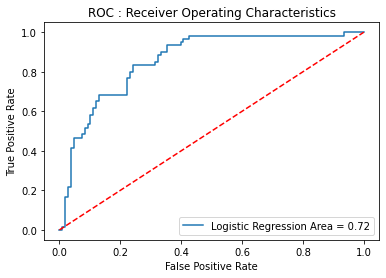

In [38]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_score = roc_auc_score(y_test,clf.predict(X_test))
fpr, tpr, thr = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr, label='Logistic Regression Area = {:.2f}'.format(roc_score))
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC : Receiver Operating Characteristics')
plt.legend()
plt.show()

__(b)__ Where on the ROC curve is our logistic regression classifier when the threshold is zero?
>When both the True Positive Rate and the False Positive Rate are equal to 1.0 .

__(c)__ Can you make any arguments for increasing or decreasing the threshold?
> The ROC score is not necessarily the optimal threshold. If you make the threshold 0.50 the difference is meaningless. Whenever you change the threshold, you change the ROC. If you increase threshold you will get more precise predictions of truE positives, but you stand the risk of more false positives. And vice versa for decreasing the ROC. In essence you'll shift the margin from where the decision is made to favor one rate over the other.

__(d)__ What does the diagonal dashed line in the ROC plot represent?
> A measure of when the FPR and THR are equal. In essence, the diagonal line in a ROC curve represents __perfect chance__. This is the case for when you're confusion matrix is symmetrical. The closer the ROC curve gets to the line, the classifier becomes more worthless.

### Feature Importance ###

### Experiment: ###
__(a)__ Create a bar chart showing the importance of each of the eight features in the data set.

In [39]:
coeff = list(clf.coef_[0])
labels = list(DF_train.drop('Outcome',1).columns)

Text(0.5, 0, 'Importance')

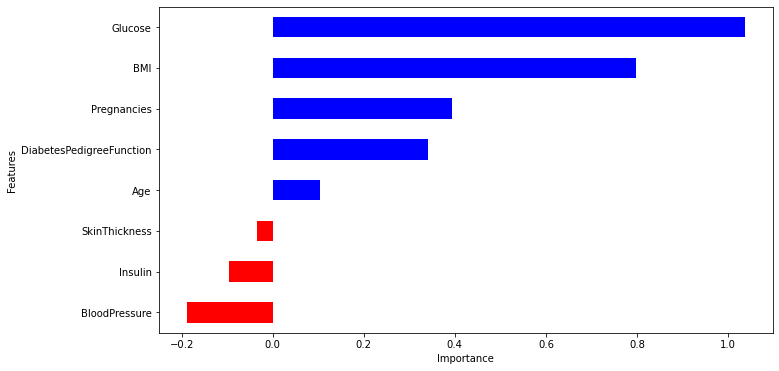

In [40]:
features = pd.DataFrame()
features['Features'] = labels[0:8]
features['importance'] = coeff[0:8]
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

__(b)__ What are the features that have the most significant influence on the model?
> Glucose and BMI seem to have the most significant influence on the model.

__(c)__ What are the features that a negative effect on diabetes?
> Skin Thickness, Insulin, and Blood Pressure.

__(d)__ Is blood pressure more important as a feature than age?
> It is, since the better someone's blood pressure is, the less likely it is that the patient will have diabetes. And as the magnitude of importance for Blood Pressure is greater than that of Age, it is safe to say that Blood Pressure is indeed more important. However, that is not to say that Age doesn't play an important role. 

## Making Predictions ##

In [41]:
array1 = np.asarray(diabetesDF.iloc[:,1:2])
label1 = np.asarray(diabetesDF['Outcome'])
LR1 = LogisticRegression()
LR1.fit(array1, label1)

LogisticRegression()

Text(0.5, 1.0, 'Predicting Diabetes from Glucose Level')

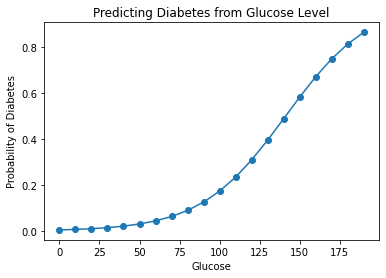

In [42]:
x=np.arange(0,200,10).reshape(-1,1)
y=LR1.predict_proba(x)
plt.scatter(x,y[:,1])
plt.plot(x,y[:,1])
plt.xlabel('Glucose')
plt.ylabel('Probability of Diabetes')
plt.title('Predicting Diabetes from Glucose Level') 

### Assignment: ###
__(a)__ What is the probability of if you are 25 years old male with a glucose level of 130 and
an insulin level of 100, blood pressure of 125, BMI of 32 and skin thickness of 30, and a
diabetes pedigree function of 1.1?


In [43]:
array2 = np.asarray(diabetesDF.iloc[:,0:8])
label2 = np.asarray(diabetesDF['Outcome'])
LR2 = LogisticRegression(max_iter = 10000)
LR2.fit(array2, label2)

LogisticRegression(max_iter=10000)

In [44]:
print(LR2.coef_[0])

[ 1.22574725e-01  3.51083559e-02 -1.33052695e-02  7.85027677e-04
 -1.17338075e-03  8.96378112e-02  8.67373211e-01  1.49730821e-02]


In [45]:
#x=np.arange(0,200,10).reshape(-1,1)
x=np.asarray([0, 130, 125, 30, 100,32, 1.1, 25])
y=LR2.predict_proba([x])
print(y)

[[0.79572951 0.20427049]]


> The probability of having diabetes is about 79.6%.

__(b)__ Generate a plot of $Pr\{Y = 1|x\}$ where the feature x is the BMI and comment on your findings, Does this plot surprise you?

In [46]:
array1 = np.asarray(diabetesDF.iloc[:,5:6])
label1 = np.asarray(diabetesDF['Outcome'])
LR1 = LogisticRegression()
LR1.fit(array1, label1)

LogisticRegression()

Text(0.5, 1.0, 'Predicting Diabetes from BMI Level')

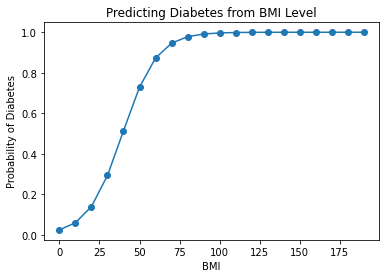

In [47]:
x=np.arange(0,200,10).reshape(-1,1)
y=LR1.predict_proba(x)
plt.scatter(x,y[:,1])
plt.plot(x,y[:,1])
plt.xlabel('BMI')
plt.ylabel('Probability of Diabetes')
plt.title('Predicting Diabetes from BMI Level') 

> This plot does not surprise me at all given that individuals with larger BMI's should have higher likelihoods of having diabetes. 

__(c)__ Repeat for a few other features to see if you discover anything interesting.

Text(0.5, 1.0, 'Predicting Diabetes from Diabetes Pedigree Function')

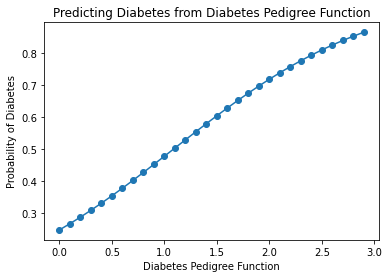

In [48]:
array1 = np.asarray(diabetesDF.iloc[:,6:7])
label1 = np.asarray(diabetesDF['Outcome'])
LR1 = LogisticRegression()
LR1.fit(array1, label1)

x=np.arange(0,3,.1).reshape(-1,1)
y=LR1.predict_proba(x)
plt.scatter(x,y[:,1])
plt.plot(x,y[:,1])
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('Probability of Diabetes')
plt.title('Predicting Diabetes from Diabetes Pedigree Function') 

Text(0.5, 1.0, 'Predicting Diabetes from Pregnancy')

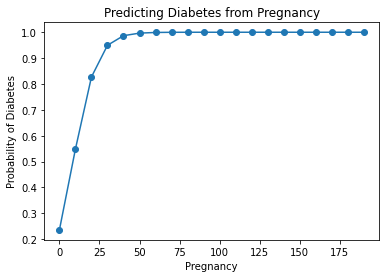

In [49]:
array1 = np.asarray(diabetesDF.iloc[:,0:1])
label1 = np.asarray(diabetesDF['Outcome'])
LR1 = LogisticRegression()
LR1.fit(array1, label1)

x=np.arange(0,200,10).reshape(-1,1)
y=LR1.predict_proba(x)
plt.scatter(x,y[:,1])
plt.plot(x,y[:,1])
plt.xlabel('Pregnancy')
plt.ylabel('Probability of Diabetes')
plt.title('Predicting Diabetes from Pregnancy') 

Text(0.5, 1.0, 'Predicting Diabetes from Blood Preasure')

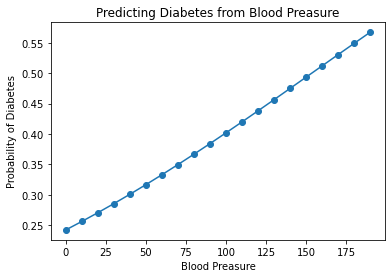

In [50]:
array1 = np.asarray(diabetesDF.iloc[:,2:3])
label1 = np.asarray(diabetesDF['Outcome'])
LR1 = LogisticRegression()
LR1.fit(array1, label1)

x=np.arange(0,200,10).reshape(-1,1)
y=LR1.predict_proba(x)
plt.scatter(x,y[:,1])
plt.plot(x,y[:,1])
plt.xlabel('Blood Preasure')
plt.ylabel('Probability of Diabetes')
plt.title('Predicting Diabetes from Blood Preasure') 

In [51]:
print(diabetesDF.iloc[:,0:8])

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
